# Heart Disease EDA

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
# import pandas_profiling

## Loading Data

In [3]:
df_heart = pd.read_csv('heart.csv')
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df_heart.shape

(303, 14)

In [5]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Types of variables

In [6]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Missing Values

In [7]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Data Exploration and Visualization

### There are more people with a chance of getting heart disease

In [215]:
df_heart['target'].value_counts()

# There are more people with a chance of getting heart disease

1    165
0    138
Name: target, dtype: int64

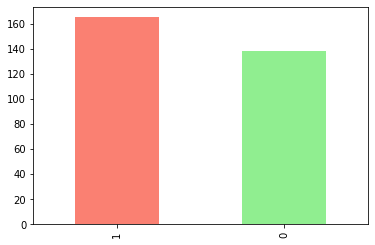

In [218]:
df_heart['target'].value_counts().plot(kind="bar", color=["salmon", "lightgreen"]);

## Correlation

### There is a correlation between 
###                                CP - chest pain type
###                                Thalach - maximum heart rate achieved 
###                                Slope type
###                                and the target column

In [193]:
df_heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


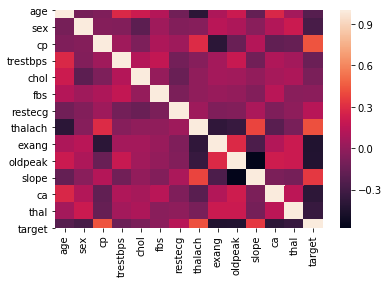

In [19]:
corr = df_heart.corr()
sns.heatmap(corr);

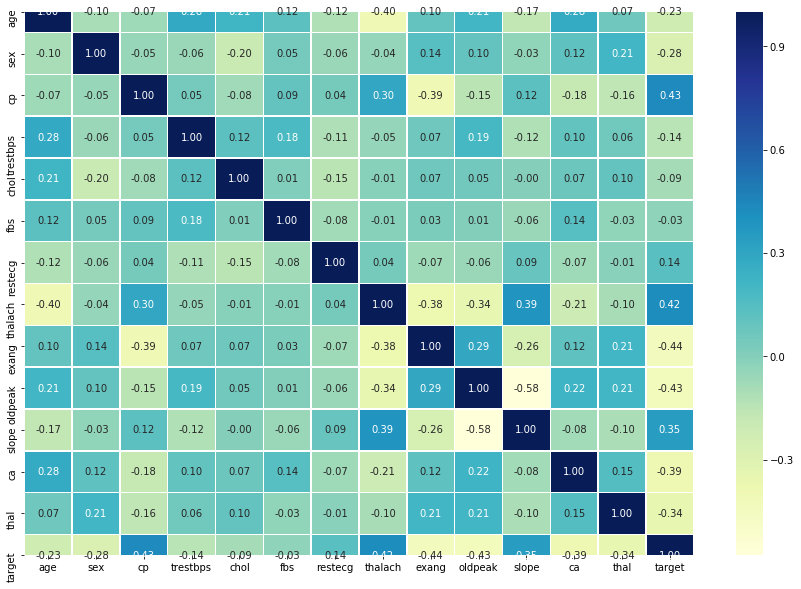

In [192]:
corr_matrix = df_heart.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim()
plt.show()

## Heart Disease by Sex

### There are more men than women
### Women are more likely to get heart disease than men

In [201]:
df_heart['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [202]:
pd.crosstab(df_heart.target, df_heart.sex)

sex,0,1
target,,
0,24,114
1,72,93


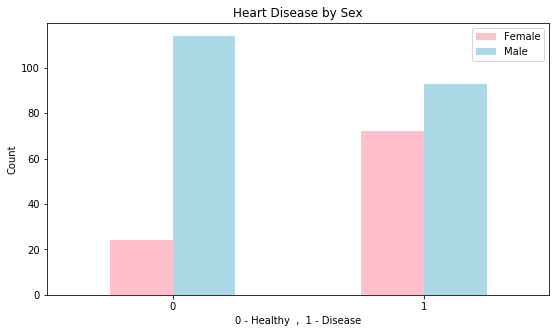

In [36]:
pd.crosstab(df_heart.target, df_heart.sex).plot(kind="bar",
                                    figsize=(9, 5),
                                    color=["pink", "lightblue"])
plt.title("Heart Disease by Sex")
plt.xlabel("0 - Healthy  ,  1 - Disease")
plt.ylabel("Count")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

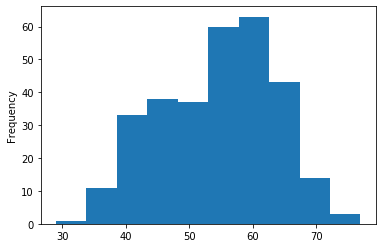

In [172]:
df_heart.age.plot.hist();
# The age distribution is mostly between the ages of 52 and 62

## Heart disease by sex and age


### The chance of developing heart disease increases between the ages of 40 and 60
### When at age 54 the chance is highest
### The median age of men with a chance of developing heart disease is 52 younger than women with a median age of 54
### Women are more likely to develop heart disease according to the data in the sample. 75% compared to 45% in men.

## Age for each target class Helthy/Disease

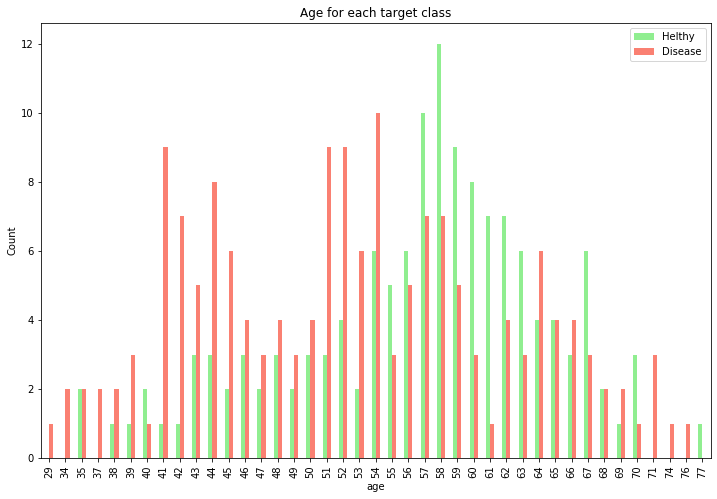

In [144]:

pd.crosstab(df_heart.age, df_heart.target, df_heart.age, aggfunc=np.count_nonzero).plot(kind='bar', figsize=(12, 8),  color=["lightgreen", "salmon"])
plt.title("Age for each target class")
plt.legend(["Helthy", "Disease"])
plt.ylabel("Count")
plt.show()

In [ ]:
# a = df_heart.groupby(['sex','age']).agg(['count'])['target']
# a
# a[a['count']>1]

## Males

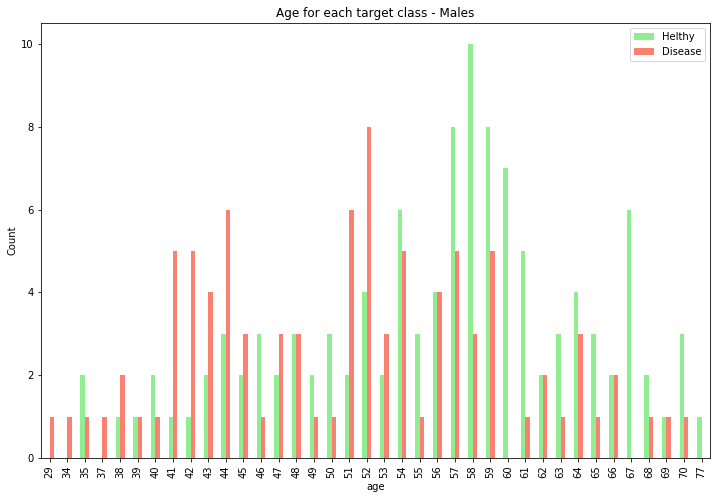

In [147]:
df_heart_males = df_heart[df_heart.sex==1]
# df_heart_males
pd.crosstab(df_heart_males.age, df_heart_males.target, df_heart_males.age, aggfunc=np.count_nonzero).plot(kind='bar', figsize=(12, 8),  color=["lightgreen", "salmon"])
plt.title("Age for each target class - Males")
plt.legend(["Helthy", "Disease"])
plt.ylabel("Count")
plt.show()

In [243]:
# male heart disease
males = df_heart[df_heart.sex==1]
males[males.target==1].age.count()/males.age.count()


0.4492753623188406

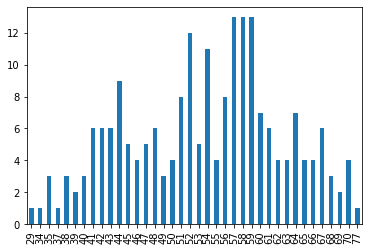

In [245]:
males['age'].value_counts().sort_index(ascending=True).plot(kind='bar');

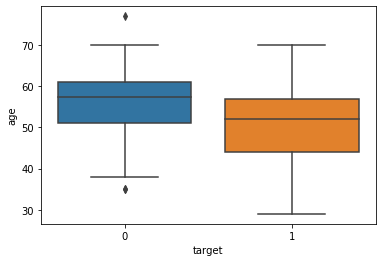

In [246]:
sns.boxplot(x=males.target,  y=males.age);

In [159]:
males[males.target==1].age.median()

52.0

## Females

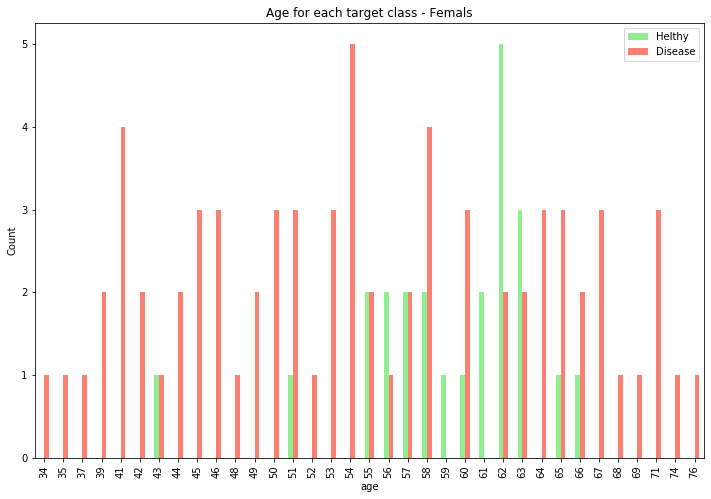

In [152]:
df_heart_females = df_heart[df_heart.sex==0]
# df_heart_females
pd.crosstab(df_heart_females.age, df_heart_females.target, df_heart_females.age, aggfunc=np.count_nonzero).plot(kind='bar', figsize=(12, 8),  color=["lightgreen", "salmon"])
plt.title("Age for each target class - Femals")
plt.legend(["Helthy", "Disease"])
plt.ylabel("Count")
plt.show()

In [248]:
# female heart disease
females = df_heart[df_heart.sex==0]
females[females.target==1].age.count()/females.age.count()


0.75

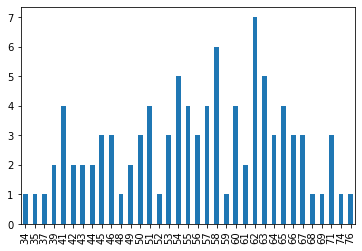

In [249]:
females['age'].value_counts().sort_index(ascending=True).plot(kind='bar');

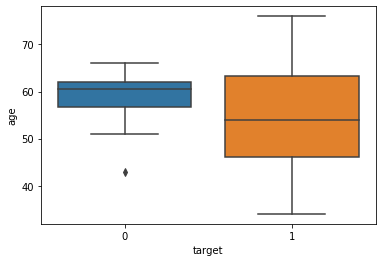

In [250]:
sns.boxplot(x=females.target,  y=females.age);

In [251]:
females[females.target==1].age.median()

54.0

In [61]:
pivot_tbl = pd.pivot_table(df_heart, values=['age'], index=['cp'], columns=['target'], aggfunc=np.count_nonzero)

## Heart Disease by Chest Pain Type

### Higher chance of heart disease when chest pain types 1, 2 or 3

In [65]:
pivot_tbl

age    
target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16

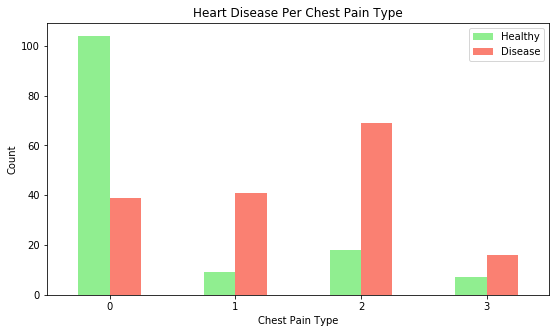

In [67]:

pivot_tbl.plot(kind="bar", figsize=(9, 5), color=["lightgreen", "salmon"])

plt.title("Heart Disease by Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(["Healthy", "Disease"])
plt.xticks(rotation=0);

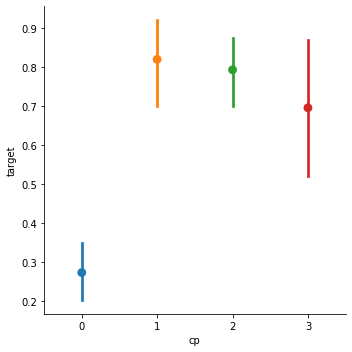

In [220]:
sns.catplot('cp','target', kind='point', data=df_heart,palette="tab10");

## Heart Disease by Age and Max Heart Rate Achieved

### As the heart rate accelerates or at an older age the chance of heart disease increases

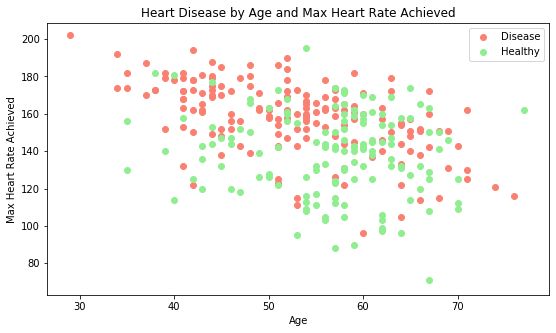

In [176]:
plt.figure(figsize=(9, 5))

# Scatter with disease people
plt.scatter(df_heart.age[df_heart.target==1],
            df_heart.thalach[df_heart.target==1],
            c="salmon")

# Scatter with healthy people
plt.scatter(df_heart.age[df_heart.target==0],
            df_heart.thalach[df_heart.target==0],
            c="lightgreen")


plt.title("Heart Disease by Age and Max Heart Rate Achieved")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate Achieved")
plt.legend(["Disease", "Healthy"]);

## Heart Disease by slope type

### Slope type 2 signs of unhealthy heart

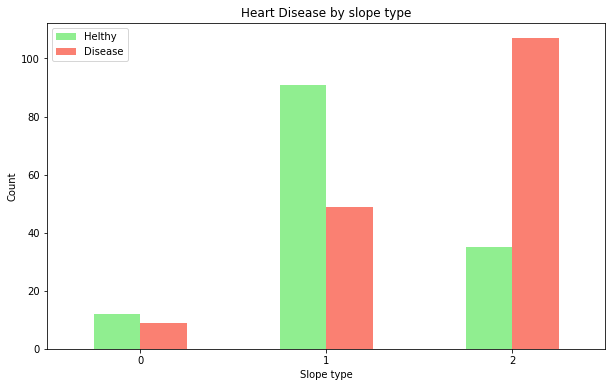

In [136]:
pd.crosstab(df_heart.slope, df_heart.target).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["lightgreen", "salmon"])
plt.title("Heart Disease by slope type")
plt.xlabel("Slope type")
plt.ylabel("Count")
plt.legend(["Helthy", "Disease"]);
plt.xticks(rotation=0);

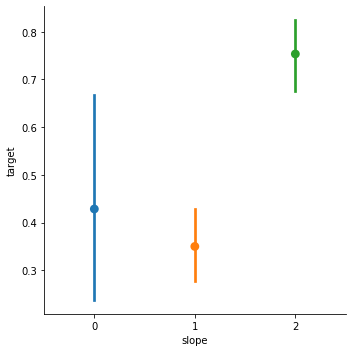

In [238]:
sns.catplot('slope','target', kind='point', data=df_heart,palette="tab10");

## Feature Engineering

## One Hot Encoding

### Convert categorical features to separate features by One Hot Encoding For example: CP and Slope

In [209]:
pd.get_dummies(df_heart, columns=["cp","slope"])

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,target,cp_0,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,1,0,0,0,1,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,2,1,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,2,1,0,1,0,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,2,1,0,1,0,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,2,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,3,0,1,0,0,0,0,1,0
299,45,1,110,264,0,1,132,0,1.2,0,3,0,0,0,0,1,0,1,0
300,68,1,144,193,1,1,141,0,3.4,2,3,0,1,0,0,0,0,1,0
301,57,1,130,131,0,1,115,1,1.2,1,3,0,1,0,0,0,0,1,0


In [254]:
df_heart.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

## Normalization

In [214]:
df_heart['age'] = (df_heart.age - df_heart.age.mean())/df_heart.age.std()

0      0.950624
1     -1.912150
2     -1.471723
3      0.179877
4      0.289984
         ...   
298    0.289984
299   -1.031296
300    1.501157
301    0.289984
302    0.289984
Name: age, Length: 303, dtype: float64

In [261]:
from scipy.stats import zscore
# df_heart['trestbps'] = zscore(df_heart.trestbps)


In [ ]:
df_heart['chol'] = zscore(df_heart.chol)

In [ ]:
df_heart['thalach'] = zscore(df_heart.thalach)

In [260]:
df_heart['oldpeak'] = zscore(df_heart.oldpeak)

## Modeling

In [68]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [69]:
# Split data into X and y
X = df_heart.drop("target", axis=1)

y = df_heart["target"]

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)